In [9]:
# LOAD WARMSTART FILE
from plot1d import *
from plotTable import *
from plot_trajectory import *
import pandas as pd
import numpy as np
import crocoddyl
crocoddyl.switchToNumpyArray()

df = pd.read_csv("warmstart.csv")
data = df.values
data = data[20:40,:]

In [10]:

def comparisions():
    
    #...... SOME UGLY UNAVOIDABLE DATA REARRANGEMENT. Feel free to skip to the part about warmstarting
    iterations = []
    for row in data:
        init_xs = []
        init_us = []
        starting_state = row[0:3]
        init_xs.append(np.array(starting_state))

        full_state = np.array(row[3:])
        full_state = full_state.reshape(30, 6)
        state = full_state[:,0:3]
        control = full_state[:,3:5]
        assert state.shape[0] == control.shape[0]
        assert state.shape[1]  == 3
        assert control.shape[1] == 2
        for state in state:
            init_xs.append(np.array(state))
        for control in control:
            init_us.append(np.array(control))


    # For comparision, both models are given the same problem. The only difference is in ddp.solve.

    #...... WARMSTARTING CROCODDYL
        model = crocoddyl.ActionModelUnicycle()
        model.costWeights = np.matrix([1, 0.3]).T
        problem = crocoddyl.ShootingProblem(np.matrix(starting_state).T, [ model ] * 30, model)
        ddp = crocoddyl.SolverDDP(problem)
        ddp.solve(init_xs, init_us, 1000)
        

    #..... COLDSTARTING CROCODDYL    
        model2 = crocoddyl.ActionModelUnicycle()
        model2.costWeights = np.matrix([1, 0.3]).T
        problem2 = crocoddyl.ShootingProblem(np.matrix(starting_state).T, [ model2 ] * 30, model2)
        ddp2 = crocoddyl.SolverDDP(problem2)
        ddp2.solve([], [], 1000)
        


    #.. Storing the number of iterations it took when warmstarting and coldstarting
        iterations.append(np.array([ddp.iter, ddp2.iter]))

    plotTable(iterations)
    iterations = np.array(iterations)
    plot_1d(iterations[:,0], xlabel = "WarmStart" ,ylabel="iterations")
    plot_1d(iterations[:,1], xlabel = "ColdStart" ,ylabel="iterations")

+-------------+-------------+
| Warmstarted | Coldstarted |
+-------------+-------------+
|      12     |      22     |
|      60     |     111     |
|      24     |      49     |
|      28     |      59     |
|      27     |      66     |
|      9      |      15     |
|      51     |      77     |
|      37     |      67     |
|      8      |      17     |
|      16     |      24     |
|      9      |      26     |
|      23     |      59     |
|      16     |      37     |
|      25     |      44     |
|      21     |      35     |
|      8      |      12     |
|      12     |      22     |
|      5      |      8      |
|      11     |      22     |
|      14     |      23     |
+-------------+-------------+


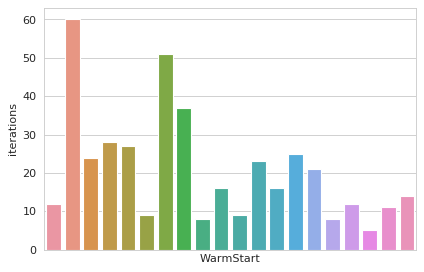

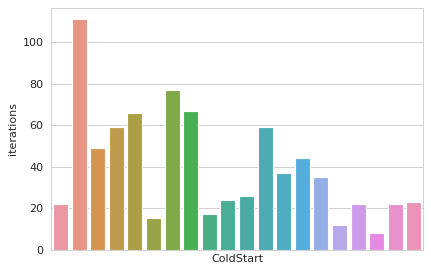

In [11]:
comparisions()

PLotting 2 trajectories for comparision 

The value functions, iterations for warmstarted and coldstarted trajectories are as follows  Cost : 9.950743941482978 , 9.950743941188692 
 iterations  41 , 37


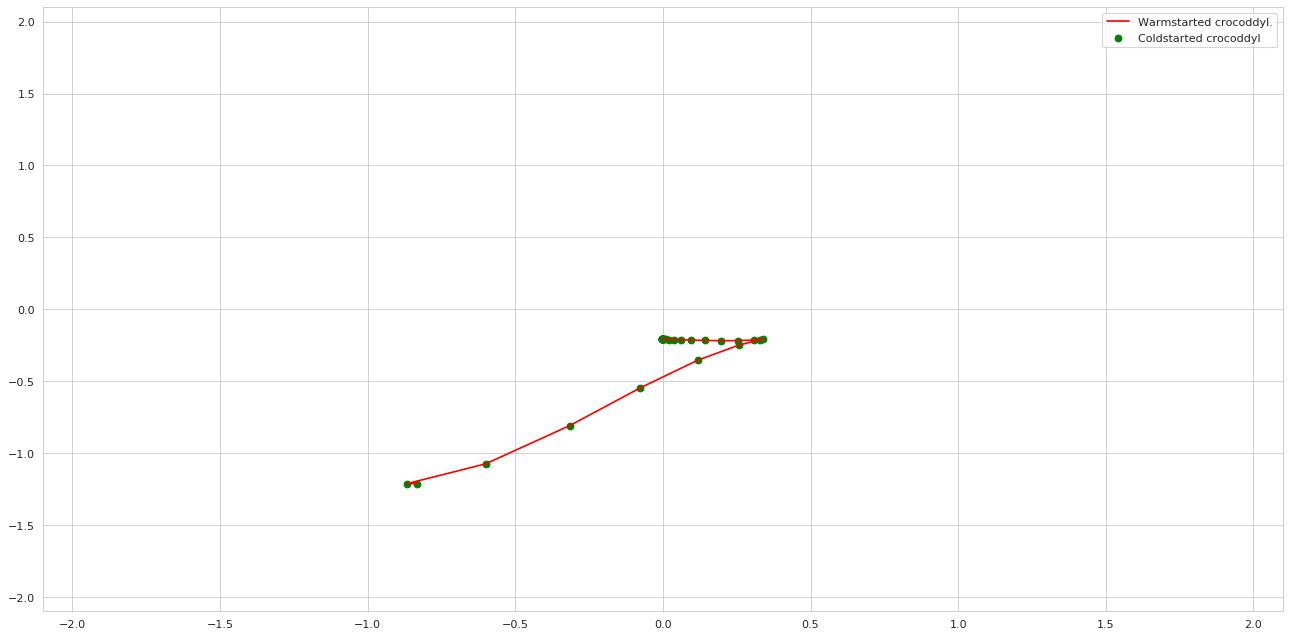

In [12]:
# This will plot two trajectories for comparision. Both trajectories(warmstrated and coldstarted) start from the same initial state.
plot_trajectories()